In [1]:
# Interplay of Hebbian and homeostatic plasticity in neuronal networks

# Intrinsic plasticity: Foldiak rate model
import numpy as np
import matplotlib.pyplot as plt

# Set model parameters
n_trials = 10000

N = 8                         # number of rows & columns in inputs
p_bar = 0.2                   # probability of vertical & horizontal bars in input                  
alpha_w = 0.0001              # learning rate for weights
ytarget = 10                  # output target 
tau_theta = 50                # time constant for theta
dt = 1

In [2]:
# Generate input patterns

def getPattern(N,p_bar):
    pattern = np.zeros([N,N])

    #vertical bars
    onbar = np.random.rand(N) < p_bar
    pattern[:,onbar]=1

    #horizontal bars
    onbar = np.random.rand(N) < p_bar;
    pattern[onbar,:]=1
    
    return pattern

def getBiasedPattern(N,p_bar):
    pattern = np.zeros([N,N])

    #vertical bars
    onbar = np.random.rand(N) < p_bar
    pattern[:,onbar]=1
    
    if np.random.rand() < 0.1: 
        pattern[:,3] = 1
        
    #horizontal bars
    onbar = np.random.rand(N) < p_bar;
    pattern[onbar,:]=1
    
    return pattern

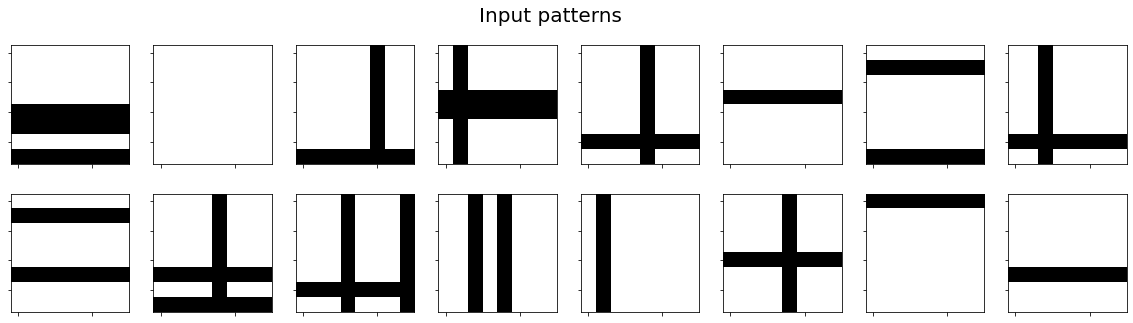

In [3]:
# Show Examples of input patterns
fig, axs = plt.subplots(2,8,figsize=(20,5))
fig.suptitle('Input patterns', fontsize=20)
for i in range(2):
    for j in range(8):
        axs[i,j].imshow(getPattern(8,0.1),cmap='binary')
        axs[i,j].set_yticklabels([])
        axs[i,j].set_xticklabels([])
plt.show()

In [4]:
# Initialize random weight matrix
w = np.zeros([N*N,n_trials])
w[:,0] = np.random.rand(N*N)

y = np.zeros([n_trials])         # output
theta = 5*np.ones([n_trials])    # sliding threshold theta

## BCM learning rule:

$ \Large y = \sum w_i x_i $ --> Linear output neuron

$ \Large\frac{dw}{dt} = \alpha ~ xy ~ (y-\theta) $

$ \Large\frac{d\theta}{dt} = c ~ (-\theta + \frac{y^2}{y_{target}}) $

In [5]:
# Train network
for t in range(n_trials-1):
        
    #Generate pattern    
    #pattern = getPattern(N,p_bar)
    pattern = getBiasedPattern(N,p_bar)
            
    #Linearize pattern
    inputs = np.reshape(pattern,N*N)

    #Normalize overall "brightness" of each pattern
    scaling_factor = 2*N - 1 #avoid very small values for input
    if sum(inputs) != 0: #don't normalize if input is blank
        inputs = scaling_factor * inputs / sum(inputs)   
    
    #Calculate output    
    y[t] = np.dot(w[:,t],inputs)                                             # compute the output
    theta[t+1] = theta[t]+dt/tau_theta*(y[t]**2/ytarget - theta[t])          # update sliding theshold
    w[:,t+1] = w[:,t] + alpha_w*inputs*y[t]*(y[t]-theta[t])                  # update of the weights    

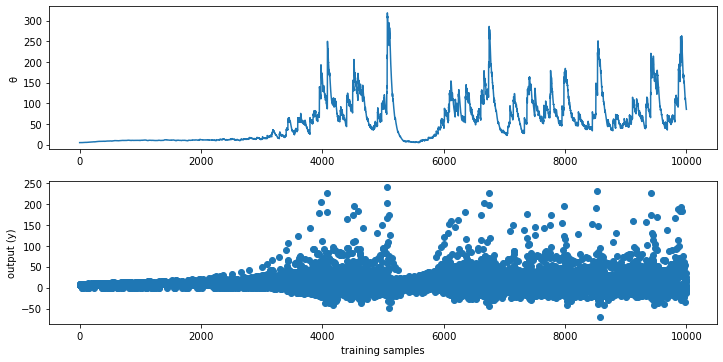

In [6]:
fig, axs = plt.subplots(2,figsize=(10,5))
fig.tight_layout()
axs[0].plot(theta)
axs[0].set(ylabel='θ')
axs[1].scatter(np.arange(len(y)),y) 
axs[1].set(ylabel='output (y)',xlabel='training samples')
plt.show()

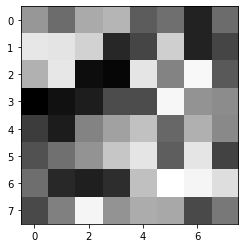

In [7]:
# Plot data       
weights = np.reshape(w[:,1],(N,N))
#p = reshape(pattern,size,size)
plt.imshow(weights,cmap='binary')
plt.show()

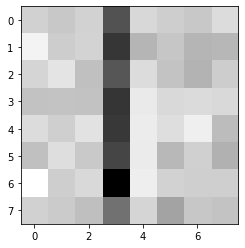

In [8]:
# Plot data       
weights = np.reshape(w[:,-1],(N,N))
#p = reshape(pattern,size,size)
plt.imshow(weights,cmap='binary')
plt.show()